In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [36]:
img_height,img_width=200,200
train_dir='./New Plant Diseases Dataset(Augmented)/train'
test_dir='./New Plant Diseases Dataset(Augmented)/test'
valid_dir='./New Plant Diseases Dataset(Augmented)/valid'

In [9]:
input_shape=(img_height,img_width,3)
num_classes=10

train_ds = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    labels='inferred',
    shuffle=True,
    seed=69,
    image_size=(img_height,img_width),
    batch_size=16
)

valid_ds = image_dataset_from_directory(
    valid_dir,
    label_mode='categorical',
    labels='inferred',
    shuffle=True,
    seed=69,
    image_size=(img_height,img_width),
    batch_size=16
)

Found 18504 files belonging to 10 classes.
Found 4626 files belonging to 10 classes.


In [37]:
test_ds = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    labels='inferred',
    image_size=(img_height,img_width),
    batch_size=16
)

Found 48 files belonging to 10 classes.


In [14]:
def cnn(input_shape=(256,256,3),num_classes=10):
    model = keras.models.Sequential([
        layers.Conv2D(16,(3,3),activation='relu',input_shape=input_shape),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(32,(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),

        
        layers.Conv2D(128,(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),

        layers.Dense(128,activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10,activation='softmax')
    ])
    return model

In [15]:
model = cnn(input_shape,num_classes)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 198, 198, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 99, 99, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 97, 97, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 46, 46, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 67712)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       8,667,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,710,634 (33.23 MB)

 Trainable params: 8,710,634 (33.23 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
hist = model.fit(train_ds,epochs=10,validation_data=valid_ds)

Epoch 1/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 334s 284ms/step - accuracy: 0.3681 - loss: 10.7317 - val_accuracy: 0.4553 - val_loss: 1.5414
Epoch 2/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 320s 277ms/step - accuracy: 0.6396 - loss: 1.0577 - val_accuracy: 0.8627 - val_loss: 0.3973
Epoch 3/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 338s 291ms/step - accuracy: 0.8690 - loss: 0.4011 - val_accuracy: 0.9369 - val_loss: 0.2005
Epoch 4/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 364s 275ms/step - accuracy: 0.9215 - loss: 0.2417 - val_accuracy: 0.9503 - val_loss: 0.1456
Epoch 5/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 323s 279ms/step - accuracy: 0.9292 - loss: 0.2323 - val_accuracy: 0.9457 - val_loss: 0.1835
Epoch 6/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 315s 272ms/step - accuracy: 0.8988 - loss: 0.3514 - val_accuracy: 0.9308 - val_loss: 0.2550
Epoch 7/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 316s 267ms/step - accuracy: 0.9412 - loss: 0.2048 - val_accuracy: 0.9406 - val_loss: 0.2298
Epoch 8/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 307s 265ms/step - a

In [ ]:
test_loss,test_acc = model.evaluate(valid_ds)
print("Accuracy:",test_acc*100)

242/290 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.9378 - loss: 0.2400

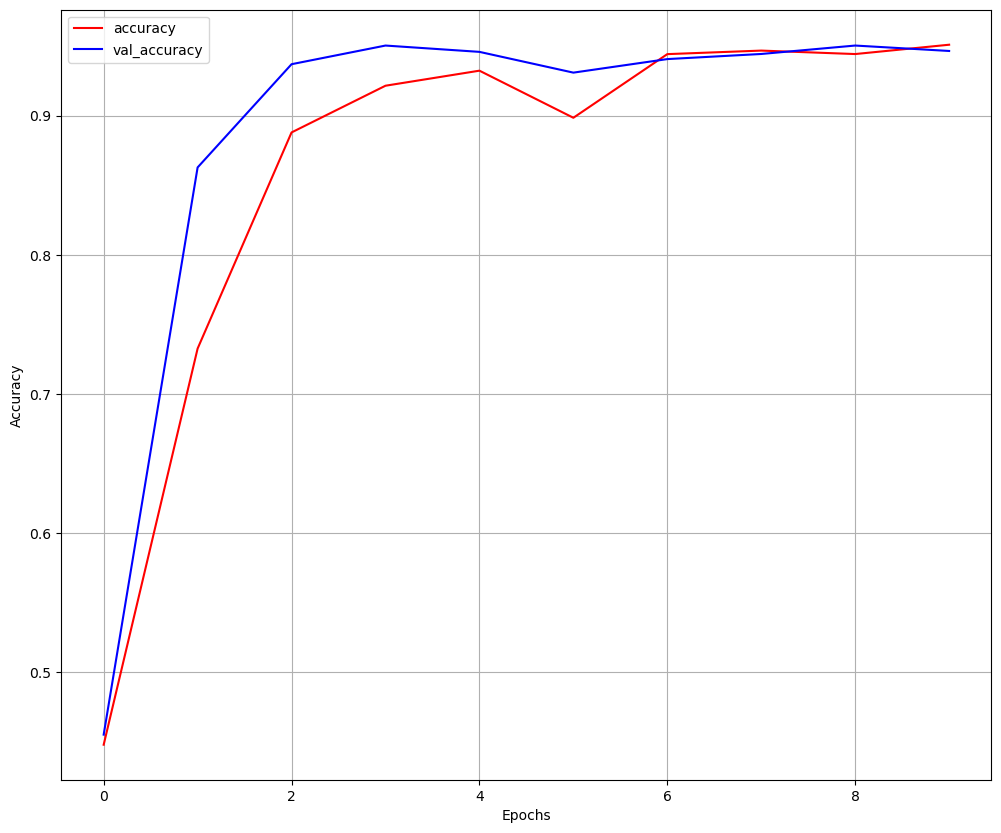

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,15))

plt.plot(hist.history['accuracy'],color='red',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='blue',label='val_accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

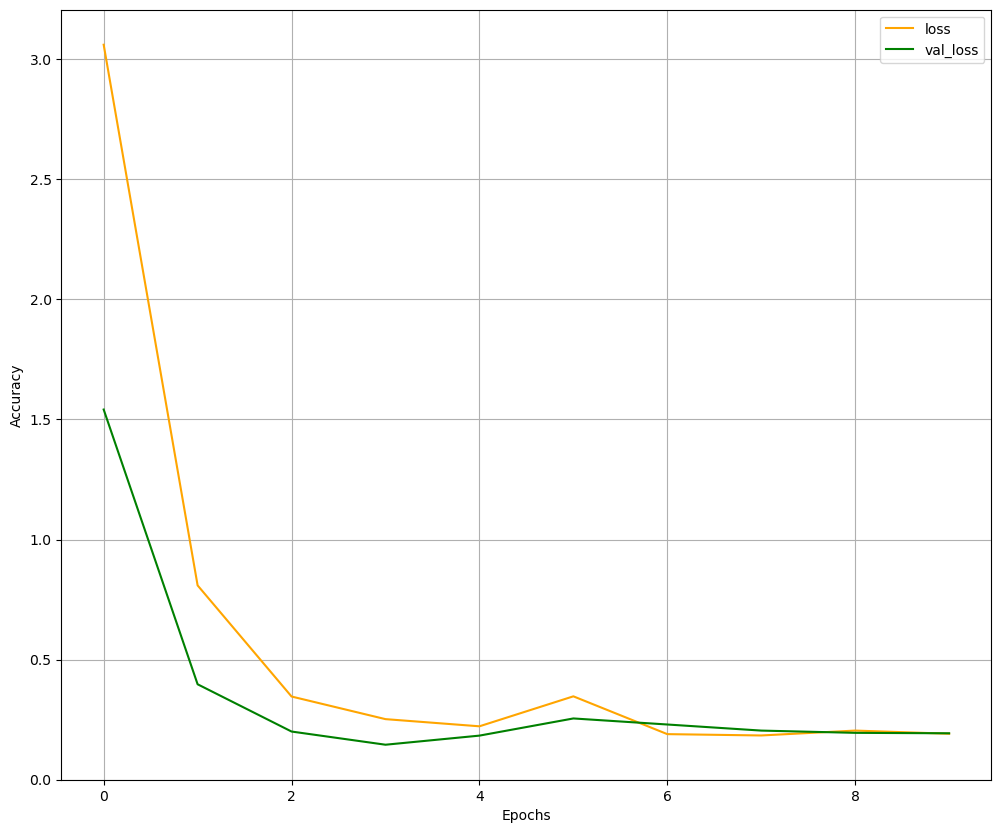

In [35]:
fig2 = plt.figure(figsize=(12,10))

plt.plot(hist.history['loss'],color='orange',label='loss')
plt.plot(hist.history['val_loss'],color='green',label='val_loss')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()